# Regression with Multiple Features — Level 2: scikit-learn

In this notebook, you will re-implement multiple feature regression using **scikit-learn** and compare with your Level 1 (from-scratch) implementation.

### Key scikit-learn Classes

| Class/Function | Purpose |
|---------------|--------|
| `LinearRegression` | Fits a linear model (handles multiple features natively) |
| `StandardScaler` | Standardizes features (z-score normalization) |
| `model.fit(X, y)` | Train the model |
| `model.predict(X)` | Make predictions |
| `model.coef_` | Learned weight vector (one per feature) |
| `model.intercept_` | Learned bias |
| `mean_squared_error` | Compute MSE |
| `r2_score` | Compute R² (1.0 = perfect fit) |

### What's New in Level 2

- `StandardScaler` replaces your manual `zscore_normalize` function
- `LinearRegression` handles any number of features
- `model.coef_` is now a vector (one weight per feature)

---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)

## 2.1 Generate the Same Synthetic Data

We use the same multi-feature data as Level 1 so we can directly compare results.

True relationship: $y = 0.5 x_1 + 2.0 x_2 + 0.1 x_3 + 4 + \text{noise}$

In [13]:
m = 1000
n = 3

X_train = np.column_stack(
    [
        500 + 3000 * np.random.rand(m),
        1 + 4 * np.random.rand(m),
        100 * np.random.rand(m),
    ]
)

w_true = np.array([0.5, 2.0, 0.1])
b_true = 4.0

y_train = X_train @ w_true + b_true + np.random.randn(m) * 5

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (1000, 3)
y_train shape: (1000,)


## 2.2 Feature Scaling with StandardScaler

In Level 1, you implemented z-score normalization manually. scikit-learn provides `StandardScaler` to do this.

**Important**: Fit the scaler on training data only, then use `transform()` on both train and test data.

In [15]:
# Step 1: Create a StandardScaler instance
# Step 2: Fit and transform X_train using fit_transform()
# Step 3: Print the mean and std before/after scaling

scaler = StandardScaler()

print("Before scaling — mean:", X_train.mean(axis=0), "std:", X_train.std(axis=0))
X_train_scale = scaler.fit_transform(X_train)

print(
    "After scaling X_train — mean:", X_train.mean(axis=0), "std:", X_train.std(axis=0)
)
print(
    "After scaling X_train_scale — mean:",
    X_train_scale.mean(axis=0),
    "std:",
    X_train_scale.std(axis=0),
)

Before scaling — mean: [1984.34447078    2.98155754   49.83335017] std: [860.44954751   1.16472661  28.77968033]
After scaling X_train — mean: [1984.34447078    2.98155754   49.83335017] std: [860.44954751   1.16472661  28.77968033]
After scaling X_train_scale — mean: [1.04416475e-15 4.69124739e-16 1.35558231e-15] std: [1. 1. 1.]


## 2.3 Fit the Model

Create a `LinearRegression` model and fit it on the scaled data.

Note: scikit-learn's `LinearRegression` uses the **Normal Equation** (closed-form), not gradient descent. It doesn't strictly require feature scaling, but scaling still helps with numerical stability and interpreting coefficients.

In [18]:
# Step 1: Create a LinearRegression instance
# Step 2: Fit on X_train_scaled and y_train
# Step 3: Print the learned weights (model.coef_) and bias (model.intercept_)

model = LinearRegression()

model.fit(X_train_scale, y_train)

print("learned weights: ", model.coef_, " Bias: ", model.intercept_)

learned weights:  [430.53626507   2.02770257   3.09580586]  Bias:  1006.8692904257905


## 2.4 Make Predictions and Evaluate

In [24]:
# Step 1: Predict using model.predict(X_train_scaled)
# Step 2: Compute MSE using mean_squared_error()
# Step 3: Compute R² using r2_score()
# Step 4: Print the metrics

predict_x = model.predict(X_train_scale)
mse = mean_squared_error(y_train, predict_x)
r_square = r2_score((y_train), predict_x)
print("MSE is: ", mse)
print("R2 Score is: ", r_square)

MSE is:  25.53268829796192
R2 Score is:  0.9998622141160658


## 2.5 Fit Without Scaling (Compare)

scikit-learn's `LinearRegression` can fit without scaling. Let's see how the coefficients compare.

In [26]:
# Step 1: Create a new LinearRegression and fit on X_train (raw)
# Step 2: Print the learned weights — they should be close to w_true!
# Step 3: Compare with the scaled version's weights

model2 = LinearRegression()

model2.fit(X_train, y_train)

print("Learned Weights: ", model2.coef_)

Learned Weights:  [0.50036201 1.74092578 0.10756915]


## 2.6 Visualize: Feature Weights Comparison

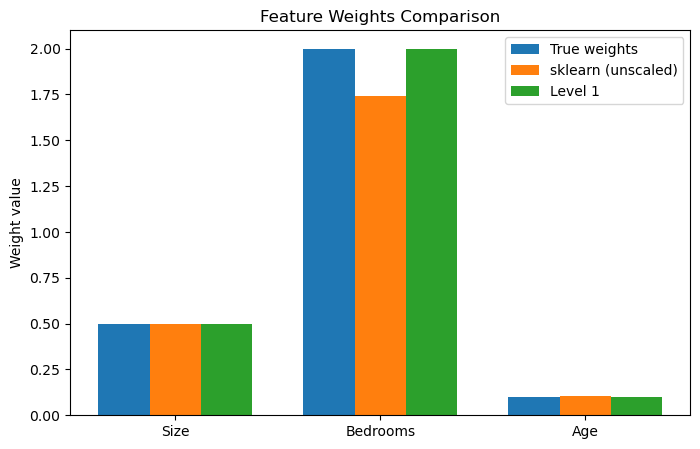

In [27]:
# 1. True weights (w_true)
# 2. sklearn weights (unscaled model — should match true weights)
# 3. Your Level 1 weights (copy from your Level 1 results)
#
# Hint: Use plt.bar() with different x positions for each group


feature_names = ["Size", "Bedrooms", "Age"]

w_sklearn = model2.coef_  # unscaled sklearn weights from 2.5
w_level1 = np.array(
    [0.5, 2.0, 0.1]
)  # replace with your Level 1 unscaled weights if you have them

x = np.arange(len(feature_names))
width = 0.25

plt.figure(figsize=(8, 5))
plt.bar(x - width, w_true, width, label="True weights")
plt.bar(x, w_sklearn, width, label="sklearn (unscaled)")
plt.bar(x + width, w_level1, width, label="Level 1")

plt.xticks(x, feature_names)
plt.ylabel("Weight value")
plt.title("Feature Weights Comparison")
plt.legend()
plt.show()

# Your visualization code here...

## Reflection Questions

Answer these in the markdown cell below:

1. When you fit on raw data, `model.coef_` matches the true weights. When you fit on scaled data, it doesn't. Why?
2. If sklearn doesn't require scaling, why is scaling still useful in practice?
3. sklearn uses the Normal Equation (closed-form), not gradient descent. What are the trade-offs?
4. How do the coefficients from the scaled model help you understand feature importance?

*Your answers here...*

---

## Next Steps

Level 2 complete! Continue to:
- **Level 3**: `multiple_regression_real_world.ipynb` — Apply to the Diabetes dataset with production-style code